In [1]:
#import library matematika, untuk imputasi mean
import math
#perhitungan matematika
import numpy as np 
#memproses data
import pandas as pd 
#visualisasi data
import matplotlib.pyplot as plt 
#membangun grafik dari library matplotlib+pandas
import seaborn as sns 
%matplotlib inline
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
#import library Random Forest
from sklearn.ensemble import RandomForestClassifier
#import library u/ mencari hyperparameter terbaik
from sklearn.model_selection import GridSearchCV
#library untuk cross_validation
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')


Bad key text.latex.preview in file C:\Users\Chandra\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 123 ('text.latex.preview : False')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key mathtext.fallback_to_cm in file C:\Users\Chandra\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 155 ('mathtext.fallback_to_cm : True  # When True, use symbols from the Computer Modern')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.5.3/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.jpeg_quality in file C:\Users\Chandra\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 418 ('savefig.jpeg_quality: 95       # when a jpeg is saved, the default quality parameter.')
You

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest #feature selection
from sklearn.feature_selection import chi2
from sklearn.utils import resample #re-sampling
from sklearn.model_selection import train_test_split #data splitting
from sklearn.preprocessing import StandardScaler #normalize features

from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.metrics import roc_auc_score #roc score

In [3]:
df = pd.read_csv("application_train.csv")
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df['TARGET'] = df['TARGET'].replace({1:'Payment Difficulties',
                                   0:'No Payment Difficulties'})

<Figure size 576x576 with 0 Axes>

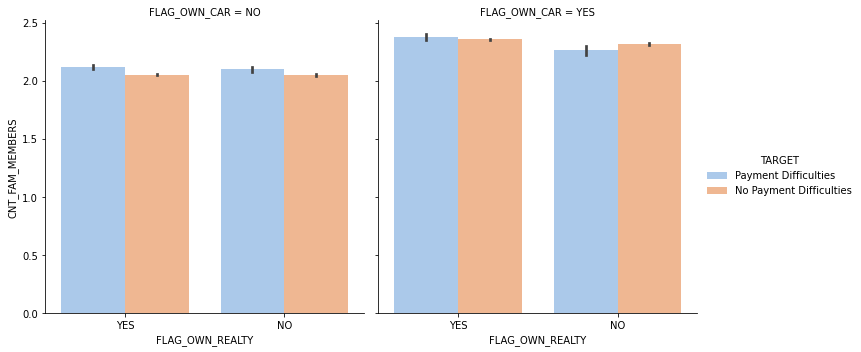

In [5]:
df = df.replace({'N':'NO', 'Y':'YES'})
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = df, x = 'FLAG_OWN_REALTY',
            y = 'CNT_FAM_MEMBERS',col='FLAG_OWN_CAR',
            hue = 'TARGET', kind = 'bar', palette = 'pastel',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
plt.show()

<Figure size 576x576 with 0 Axes>

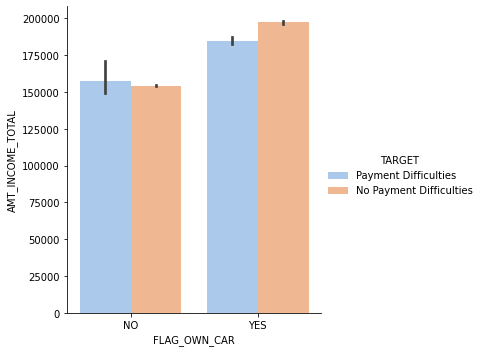

In [6]:
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = df, x = 'FLAG_OWN_CAR',
            y = 'AMT_INCOME_TOTAL', 
            hue = 'TARGET', kind = 'bar', palette = 'pastel',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

plt.show()

<Figure size 576x576 with 0 Axes>

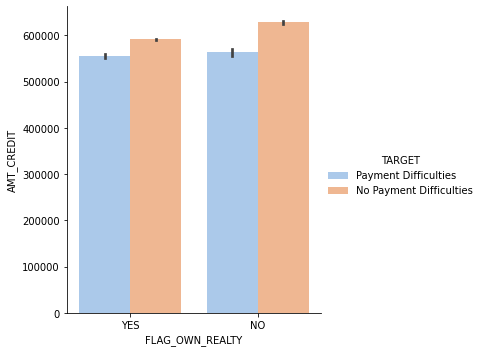

In [7]:
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = df, x = 'FLAG_OWN_REALTY',
            y = 'AMT_CREDIT',  
            hue = 'TARGET', kind = 'bar', palette = 'pastel',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)

plt.show()

<Figure size 576x576 with 0 Axes>

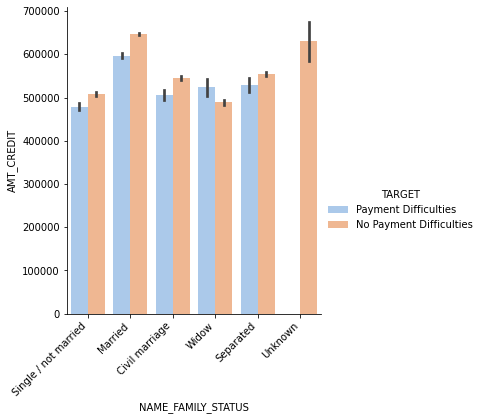

In [8]:
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = df, x = 'NAME_FAMILY_STATUS',
            y = 'AMT_CREDIT',
            hue = 'TARGET', kind = 'bar', palette = 'pastel',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()

<Figure size 576x576 with 0 Axes>

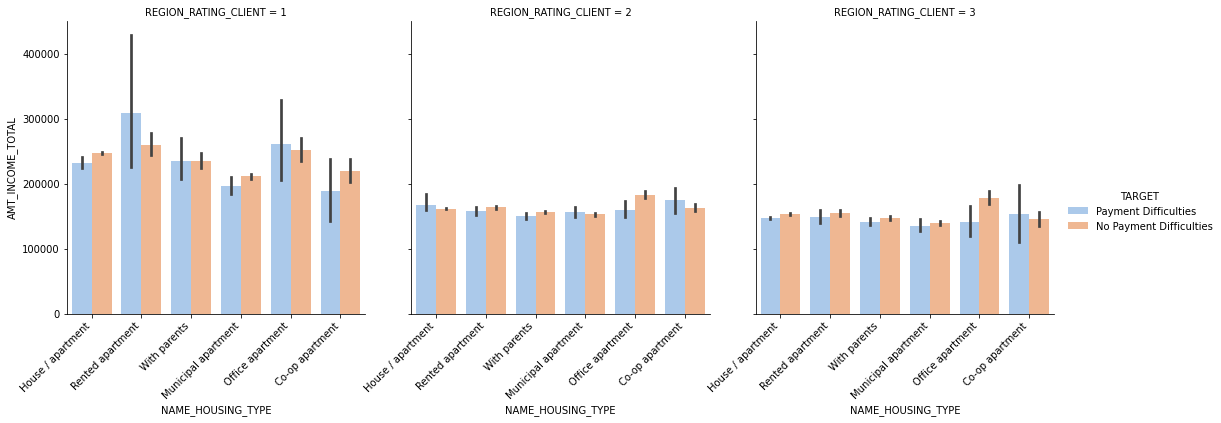

In [9]:
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = df, x = 'NAME_HOUSING_TYPE',
            y = 'AMT_INCOME_TOTAL', col = 'REGION_RATING_CLIENT', 
            hue = 'TARGET', kind = 'bar', palette = 'pastel',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()
     

<Figure size 576x576 with 0 Axes>

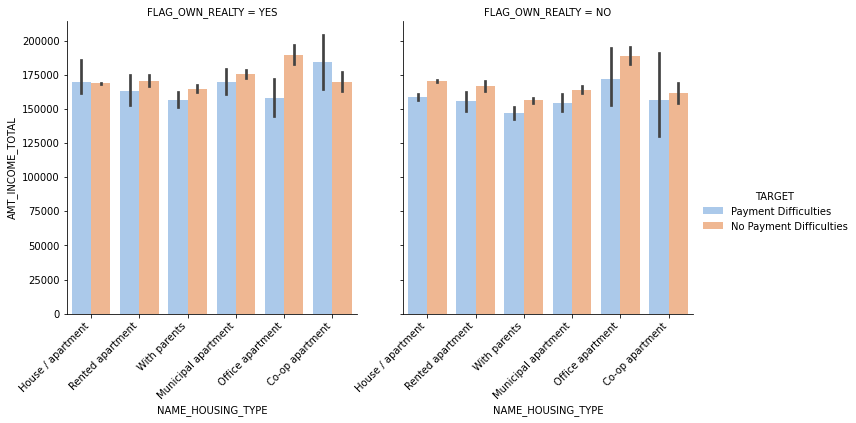

In [10]:
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = df, x = 'NAME_HOUSING_TYPE',
            y = 'AMT_INCOME_TOTAL', col = 'FLAG_OWN_REALTY', 
            hue = 'TARGET', kind = 'bar', palette = 'pastel',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()
     

<Figure size 576x576 with 0 Axes>

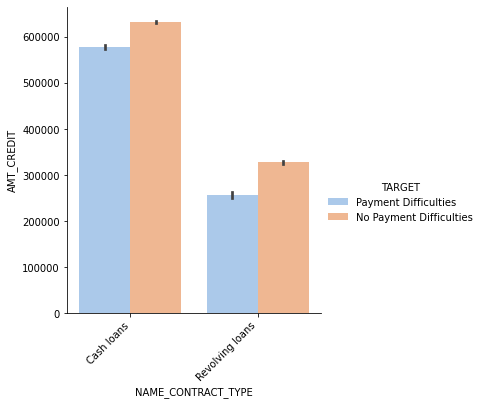

In [11]:
fig = plt.figure(figsize=(8,8))
ax = sns.catplot(data = df, x = 'NAME_CONTRACT_TYPE',
            y = 'AMT_CREDIT', 
            hue = 'TARGET', kind = 'bar', palette = 'pastel',)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
ax.set_xticklabels(rotation=45, horizontalalignment='right')
plt.show()
     